# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_tbl = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
import pandas as pd

# Find the table rows
rows = mars_tbl.find_all('tr')

# Extract the column headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Extract the table data rows
data_rows = rows[1:]

# Extract the data from each row
data = []
for row in data_rows:
    row_data = [column.text.strip() for column in row.find_all('td')]
    data.append(row_data)


In [7]:
# Create a Pandas DataFrame
mars_df = pd.DataFrame(data, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date, dayfirst=False)
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')
mars_df['pressure'] = mars_df['pressure'].astype('float64')


In [11]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [12]:
# 1. How many months are there on Mars?
mars_months = mars_df.groupby('month')
month_ct = mars_months['month'].count()
month_ct

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
rows = len(mars_df)
rows

1867

In [14]:
# 3. What is the average low temperature by month?
avg_temp = mars_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

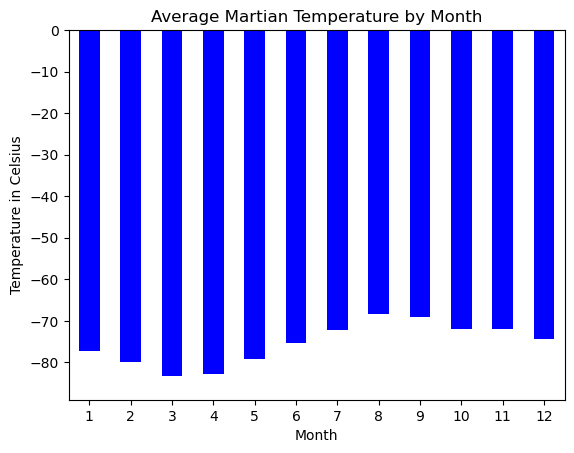

In [23]:
import numpy as np

# Plot the average temperature by month
# Set the x-axis and y-axis data
x = avg_temp.index
y = avg_temp.values

# Plot the bar chart
plt.bar(x, y, color='blue', width=0.5)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Martian Temperature by Month')

# Set the x-axis and y-axis limits
plt.xlim(0.5, 12.5)
plt.ylim(-89, 0)
plt.xticks(np.arange(1, 13, 1))

# Show the plot
plt.show()

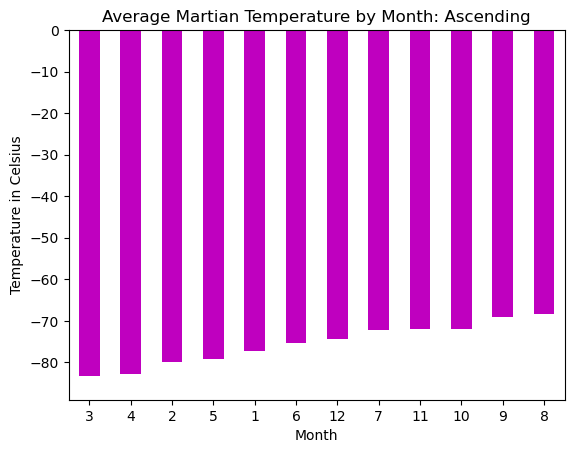

In [29]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the average temperatures in ascending order
temp_sorted = avg_temp.sort_values(ascending=True)

# Plot the average temperature by month
# Set the x-axis and y-axis data
x = np.arange(1, 13)
y = temp_sorted.values

# Plot the bar chart
plt.bar(x, y, color='m', width=0.5)

# Set the x-axis and y-axis limits and ticks
plt.xlim(0.5, 12.5)
plt.ylim(-89, 0)
plt.xticks(x, temp_sorted.index)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Martian Temperature by Month: Ascending')

# Show the plot
plt.show()

In [30]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

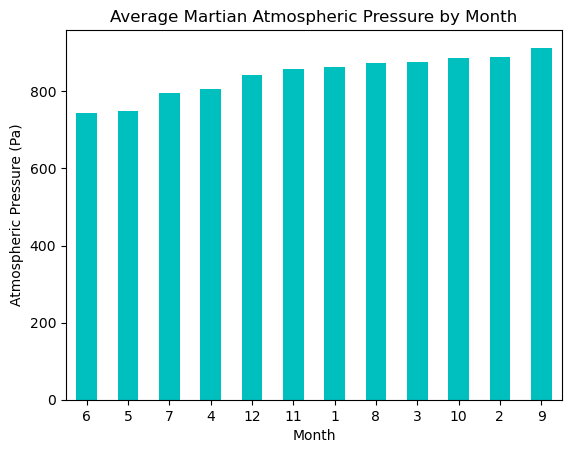

In [32]:
# Plot the average pressure by month in ascending order.
# Sort the average pressure in ascending order.
press_sorted = avg_pressure.sort_values(ascending=True)

# Set the x-axis and y-axis data
x = np.arange(1, 13)
y = press_sorted.values

# Plot the bar chart
plt.bar(x, y, color='c', width=0.5)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (Pa)')
plt.title('Average Martian Atmospheric Pressure by Month')

# Set the x-axis and y-axis limits
plt.xlim(0.5, 12.5)
plt.xticks(x, press_sorted.index)

# Show the plot
plt.show()

In [39]:
# Calculate the difference in days from the first date
mars_df['earth_day'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days + 1

# Display the updated DataFrame
mars_df.head(50)

,id,terrestrial_date,sol,ls,month,min_temp,pressure,earth_day
0,2,2012-08-16,10,155,6,-75.0,739.0,1
1,13,2012-08-17,11,156,6,-76.0,740.0,2
2,24,2012-08-18,12,156,6,-76.0,741.0,3
3,35,2012-08-19,13,157,6,-74.0,732.0,4
4,46,2012-08-20,14,157,6,-74.0,740.0,5
5,57,2012-08-21,15,158,6,-78.0,740.0,6
6,68,2012-08-22,16,158,6,-77.0,740.0,7
7,79,2012-08-23,17,159,6,-76.0,742.0,8
8,112,2012-08-27,21,161,6,-74.0,741.0,12
9,114,2012-08-28,22,162,6,-74.0,742.0,13


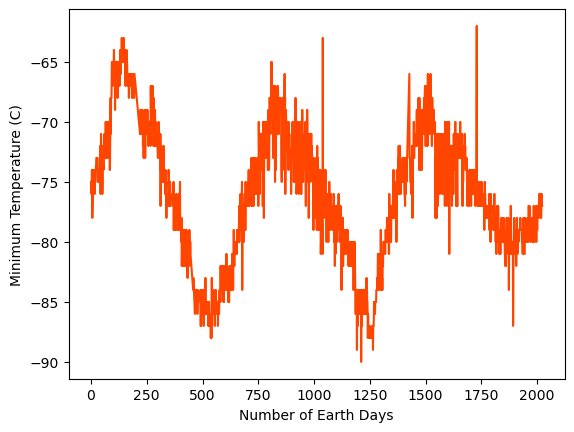

In [41]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# First, calculate the difference between each (earth) day and the first date.
# Set this new value as 'earth_day" to establish passage of time on earth.
mars_df['earth_day'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days + 1

# Plot the line graph using the values in the updated dataframe.
plt.plot(mars_df['earth_day'], mars_df['min_temp'], color='orangered')

# Set the x-axis label
plt.xlabel('Number of Earth Days')

# Set the y-axis label
plt.ylabel('Minimum Temperature (C)')

# Display the line graph
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV


In [ ]:
browser.quit()